# **Twitter US Airline Sentiment**

## **Background and Context:**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

## **Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

## **Dataset:**

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone

## **Objective**

The data provided are customer tweets regarding specific airline flight experiences.  The tweets are already labeled with an airline_sentiment (positive, negative, or neutral) and a confidence level is provided along with the airline_sentiment, and negativereason.  Additional fields are provided with _gold presumably specific to airline gold members.  Customer Twitter handles are provided under "name" and airline names are provided under "airline".  Lastly, there are several metadata columns including coordinates, location, datetime stamp, and user timezone.

My goal with this project is to provide insight on the data and create a model which will effectively be able to identify an airline tweet sentiment (positive, negative or neutral) from a tweet.

### **Import the Libraries and Load Data**

In [1]:
import re
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

nltk.download('stopwords')    #download stopwords
nltk.download('punkt')

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

!pip install vaderSentiment    # Install vader sentiment package
!pip install textblob   # Install textblob package

# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

from nltk.corpus import stopwords                       # Import stopwords.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score      

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Connect to the google drive
from google.colab import drive
drive.mount('/content/gdrive.py', force_remount=True) 

Mounted at /content/gdrive.py


In [3]:
cd '/content'

/content


In [4]:
cd 'gdrive.py/'

/content/gdrive.py


In [5]:
cd 'MyDrive/'

/content/gdrive.py/MyDrive


In [6]:
cd 'Colab Notebooks/Module 9/Project/'

/content/gdrive.py/MyDrive/Colab Notebooks/Module 9/Project


In [7]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")

In [8]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## **EDA**

In [9]:
## Look at a single tweet.
data['text'].values[14000]

'@AmericanAir Thanks for the reply, but a functioning plane four hours ago was the only way to do that. The staff was friendly, tho.'

In [10]:
data.shape

(14640, 15)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

### **Univariate Analysis**

There are many columns where 30% or more of the data is null.  I will take a closer look at these columns.

In [12]:
data["negativereason"].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [13]:
#Number of Unique values
data["negativereason"].nunique()

10

In [14]:
data["negativereason_confidence"].value_counts()     

1.0000    3436
0.0000    1344
0.6667      62
0.6632      33
0.6596      29
          ... 
0.3713       1
0.3386       1
0.6449       1
0.3274       1
0.7255       1
Name: negativereason_confidence, Length: 1410, dtype: int64

In [15]:
data["airline_sentiment_gold"].value_counts()

negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64

In [16]:
data["negativereason_gold"].value_counts()

Customer Service Issue                      12
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Late Flight\nFlight Attendant Complaints     1
Late Flight\nLost Luggage                    1
Bad Flight                                   1
Lost Luggage\nDamaged Luggage                1
Late Flight\nCancelled Flight                1
Flight Attendant Complaints                  1
Customer Service Issue\nLost Luggage         1
Customer Service Issue\nCan't Tell           1
Name: negativereason_gold, dtype: int64

In [17]:
#Number of Unique values
data["negativereason_gold"].nunique()

13

In [18]:
data["tweet_coord"].value_counts()

[0.0, 0.0]                      164
[40.64656067, -73.78334045]       6
[32.91792297, -97.00367737]       3
[40.64646912, -73.79133606]       3
[35.22643463, -80.93879965]       2
                               ... 
[40.69429232, -74.17208436]       1
[37.61833841, -122.38389799]      1
[37.61859126, -122.38385699]      1
[45.58931882, -122.5959928]       1
[40.64946781, -73.76624703]       1
Name: tweet_coord, Length: 832, dtype: int64

In [19]:
data["tweet_location"].value_counts().head(40)


Boston, MA                     157
New York, NY                   156
Washington, DC                 150
New York                       127
USA                            126
Chicago                        104
Los Angeles, CA                 96
New York City                   96
NYC                             95
San Francisco, CA               91
San Francisco                   86
Chicago, IL                     81
Brooklyn, NY                    66
Austin, TX                      64
Los Angeles                     64
Washington, D.C.                63
Boston                          62
Dallas, TX                      54
Washington DC                   53
Nashville, TN                   45
Texas                           42
NY                              42
Philadelphia, PA                38
San Diego                       38
Denver, CO                      37
Houston, TX                     35
Global                          34
Seattle                         34
Logan International 

In [20]:
#Number of Unique values
data["tweet_location"].nunique()

3081

In [21]:
data["user_timezone"].value_counts().head(40)             

Eastern Time (US & Canada)     3744
Central Time (US & Canada)     1931
Pacific Time (US & Canada)     1208
Quito                           738
Atlantic Time (Canada)          497
Mountain Time (US & Canada)     369
Arizona                         229
London                          195
Alaska                          108
Sydney                          107
Hawaii                          104
Amsterdam                        74
America/Chicago                  37
Indiana (East)                   26
America/New_York                 26
Paris                            25
Abu Dhabi                        23
Brasilia                         23
Santiago                         17
Greenland                        17
Dublin                           17
Tehran                           17
Athens                           16
Casablanca                       15
Mid-Atlantic                     15
America/Los_Angeles              15
New Delhi                        15
Buenos Aires                

In [22]:
#Number of Unique values
data["user_timezone"].nunique()


85

* There are currently 14640 Rows of data in 15 columns
* We can drop **tweet_id** as it is not useful to the model.
* To make the datetime field usable for analysis, I will parse out the the components of the **"tweet_created"** field.
* Two columns, **airline_sentiment_gold** and **negativereason_gold** has only 40 and 32 non-null columns.  These columns would not provide statistically relevant information and will be dropped.
* Less than 10% of the rows in the **tweet_coord** column have data.  This column can be dropped.
* Four Colummns are missing data in roughly 1/3rd of rows:
  * **negativereason** - this would be interesting information to graph to see how negative reason impacts tweet sentiment.  
  * **negativereason_confidence** - same as negativereason.
  * **tweet_location** - this is interesting information for the purpose of plotting to check for correlations where data exhists.  Again there is a lot of missing data and wouldnt make sense to use in a model.  There are also a lot of values and without bucketing the data into regions, it may be hard to make sense of.
  * **user_timezone** - This is very interesting information but it is dirty.  For example, there are time zones represented as Central Time (US & Canada) and as Indiana (East).  This should be the same timezone.  There are a total of 85 time zones.  It would be interesting to plot it to see if there are any relationships between negative/positive sentiment and timezone but it may be unreliable without analysis and conforming.
* Fortunately, we do not have any null **tweets** text fields.





### **Initial Data Conversion***
* Change the tweet created datatime stamp into something we can analyze
* Drop Unique Identifier as it is of no use to building our model

In [23]:
df = data.copy()

In [24]:
#Parse out each part of the date and add it as a new column
year=[]
month=[]
date=[]
hour=[]
for x in df['tweet_created']:
    year.append(int(x.split("-")[0]))                                          #extraction of year from date column and appending into list
    month.append(int(x.split("-")[1]))                                         #extraction of month from date column and appending into list
    date.append(int(x.split("-")[2].split(" ")[0]))                            #extraction of date of the month from date column and appending into list
    hour.append(int(x.split("-")[2].split(" ")[1].split(":")[0]))              #extraction of hour of that day from date column and appending into list

df['year']=year
df['month']=month
df['dates']=date
df['hour']=hour

#Drop tweet_created - we dont need it since we already parsed out what we need from it.
df.drop(columns=['tweet_created'],inplace=True)

In [25]:
#Drop tweet_id column
df.drop(columns=['tweet_id'],inplace=True)
#Drop airline_sentiment_gold column
df.drop(columns=['airline_sentiment_gold'],inplace=True)
#Drop negativereason_gold column
df.drop(columns=['negativereason_gold'],inplace=True)
#Drop tweet_coord column
df.drop(columns=['tweet_coord'],inplace=True)
##Drop negativereason column
#df.drop(columns=['negativereason'],inplace=True)
##Drop tweet_location column
#df.drop(columns=['tweet_location'],inplace=True)
##Drop user_timezone column
#df.drop(columns=['user_timezone'],inplace=True)
##Drop negativereason_confidence column
#df.drop(columns=['negativereason_confidence'],inplace=True)

In [26]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_location,user_timezone,year,month,dates,hour
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,Eastern Time (US & Canada),2015,2,24,11
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,Pacific Time (US & Canada),2015,2,24,11
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,Lets Play,Central Time (US & Canada),2015,2,24,11
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,Pacific Time (US & Canada),2015,2,24,11
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,Pacific Time (US & Canada),2015,2,24,11


In [27]:
#get the unique values of every column
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [28]:
unidf = return_unique_values(df)
print(unidf)

                        Features  Uniques
0              airline_sentiment        3
1   airline_sentiment_confidence     1023
2                 negativereason       10
3      negativereason_confidence     1410
4                        airline        6
5                           name     7701
6                  retweet_count       18
7                           text    14427
8                 tweet_location     3081
9                  user_timezone       85
10                          year        1
11                         month        1
12                         dates        9
13                          hour       24


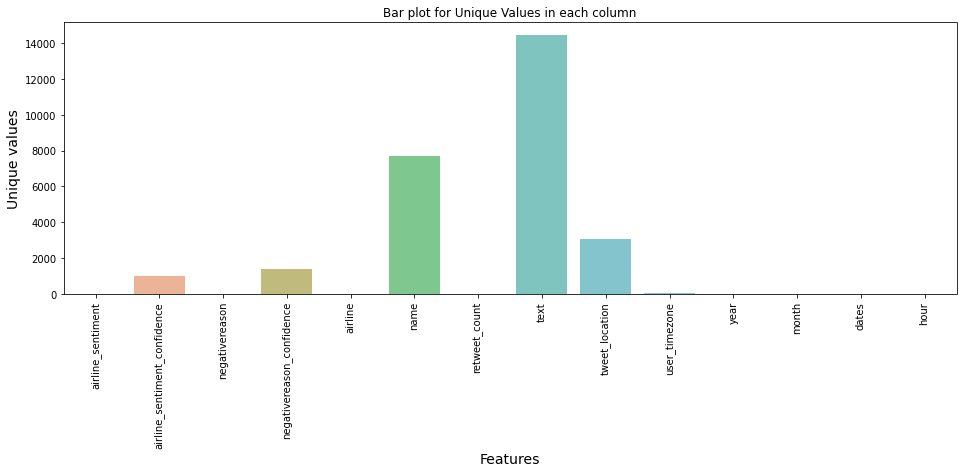

In [29]:
# plot the count of unique values in every column
f, ax = plt.subplots(1,1, figsize=(16,5))
sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

This chart confirms that the majority of columns do not have a lot of unique values.

In [30]:
#Check how many unique names we have who are creating tweets
df["name"].nunique()

7701

In [31]:
#Check who is creating the most tweets
df["name"].value_counts().head(30)

JetBlueNews        63
kbosspotter        32
_mhertz            29
otisday            28
throthra           27
weezerandburnie    23
rossj987           23
GREATNESSEOA       22
MeeestarCoke       22
scoobydoo9749      21
jasemccarty        20
ElmiraBudMan       19
georgetietjen      19
flemmingerin       19
ThatJasonEaton     18
chagaga2013        18
Aero0729           18
thomashoward88     18
SMHillman          17
worldwideweg       17
heyheyman          16
patrick_maness     16
arthurhasher       16
Allisonjones704    15
luvthispayne       15
farfalla818        14
Heavenlychc9       14
BernardLeCroix     14
geekstiel          14
davidgoodson71     14
Name: name, dtype: int64

In [32]:
# function to create labeled barplots
def labeled_barplot(data, feature,  title, pallet,perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(16, 4))
    else:
        plt.figure(figsize=(16, 4))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data[feature],
        palette=pallet,
        order=data[feature].value_counts().index[:20],
    )
    ax.set_title('Frequency of {} tweeting about Social Dielamma'.format(title))

    for p in ax.patches:
        if perc == True:
            label = "{:1.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


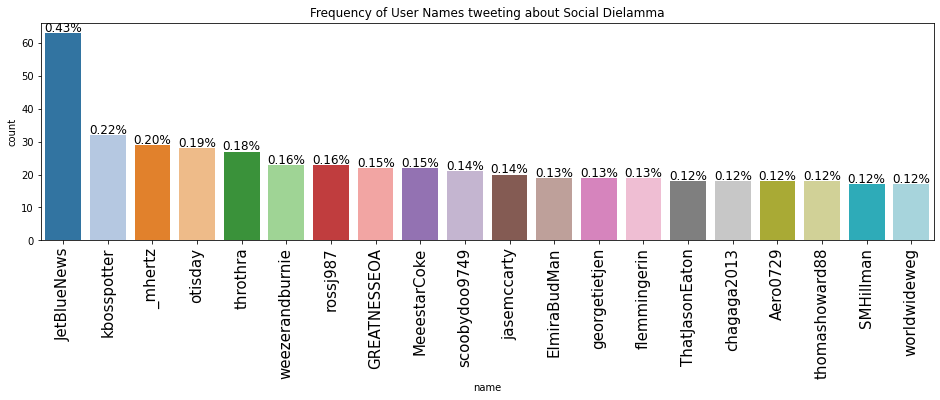

In [33]:
#Visualize the top 20 users by number of tweets
labeled_barplot(df, 'name', 'User Names','tab20')

* We have 7701 unique users.  This indicates that we are getting only 2 tweets on average per user.
* The most frequent tweeter is JetBlueNews - likely a company twitter site.  the rest of the top tweeters appear to be customers or general users.
* We do have significant number of tweets likely from frequent fliers.  It may be worthwhile to consider reaching out to them with incentives.

(array([3099.,    0.,    0.,    0.,    0., 2363.,    0.,    0.,    0.,
        9178.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

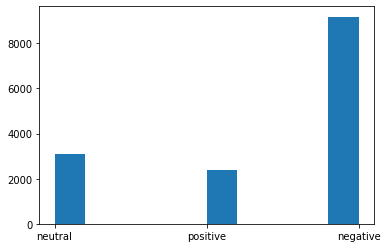

In [46]:
#Plot of distribution of sentiment across all tweets
plt.hist(df["airline_sentiment"])

We can see that we have several times as many negative tweets as positive tweets indicating that we do not have a balanced load.  The model may perform better with the target variable balanced.

In [35]:
data["airline"].value_counts().head(40)    

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

(array([ 504.,    0., 3822.,    0., 2420.,    0., 2222.,    0., 2913.,
        2759.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

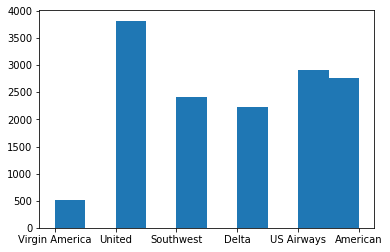

In [47]:
#Plot distribution of tweets among each airline
plt.hist(df["airline"])

We have nearly 8 times as many tweets for United as we do for Virgin American.  The other 4 airlines have relatively similar amount of data.


In [36]:
data["negativereason"].value_counts()   

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

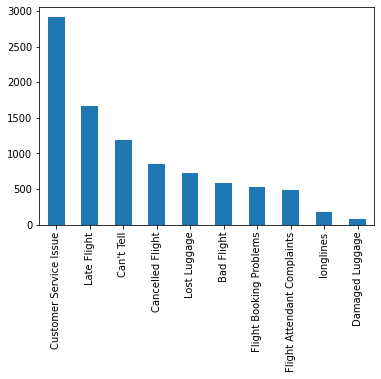

In [37]:
df['negativereason'].value_counts().plot.bar()

Interestingly, the top reason for a negative reaction is a poor customer service more so than issues with travel.

In [38]:
df["year"].value_counts()


2015    14640
Name: year, dtype: int64

In [39]:
df["month"].value_counts()

2    14640
Name: month, dtype: int64

In [40]:
df["dates"].value_counts()

22    3079
23    3028
21    1557
20    1500
17    1408
19    1376
24    1344
18    1344
16       4
Name: dates, dtype: int64

In [41]:
df["hour"].value_counts()

9     1013
11     986
10     962
14     927
8      926
13     900
12     824
15     788
7      776
17     754
18     751
16     734
19     675
6      621
20     602
5      477
21     430
4      368
22     292
3      225
23     193
2      174
0      131
1      111
Name: hour, dtype: int64

* It looks like all the data is from a 7 or 8 day period during the month of 11/2015.  Since the data is from such a breif period of time, I dont believe the date information is of value.  I will drop year, month and date.  
* The information about hour might be interesting.  It would be interesting to see at what time people are typically having issues.

In [42]:
#Drop year
df.drop(columns=['year'],inplace=True)
#Drop month
df.drop(columns=['month'],inplace=True)
#Drop dates
df.drop(columns=['dates'],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


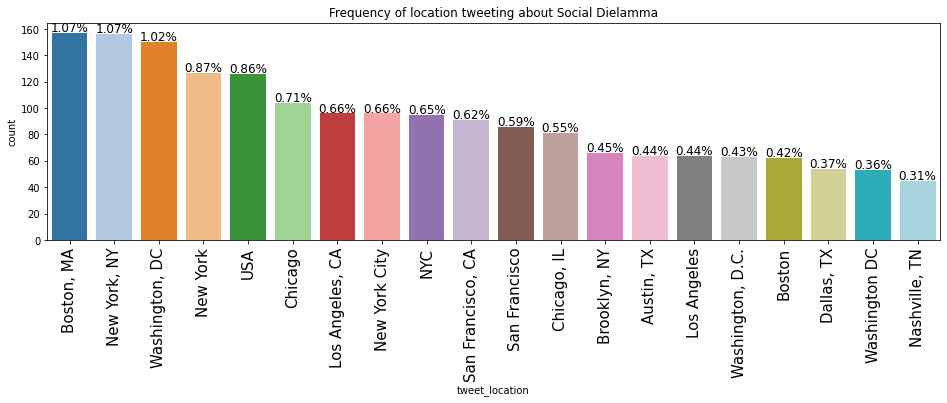

In [43]:
#Visualize the top 20 users by number of tweets
labeled_barplot(df, 'tweet_location', 'location','tab20')

* The majority of tweets are coming from Boston, New York, Washington DC, and Chicago.  The most seem to be coming from New York.  It is hard to tell without spending extensive time cleaning the data as the list "NYC","New York", "New York City" and "New York, NY" as 4 separate categories when it should be one.

### **Bivariate Analysis**

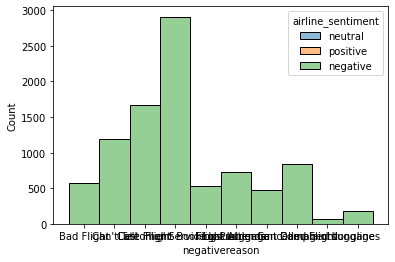

In [94]:
#Insure that negative reason is only applied to the negative sentiment tweets.
sns.histplot(x='negativereason',data=df,hue=df['airline_sentiment'],bins=3)

We can see that the data is relatively clean and that negative reason is only assigned to negative reviews.

In [122]:
#Rollup data by negativereason and airline and add count
df_A = df[['negativereason', 'airline']].copy() 
df_no_na = df_A.dropna()

ds = (df_no_na.groupby(['negativereason', 'airline']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count'))

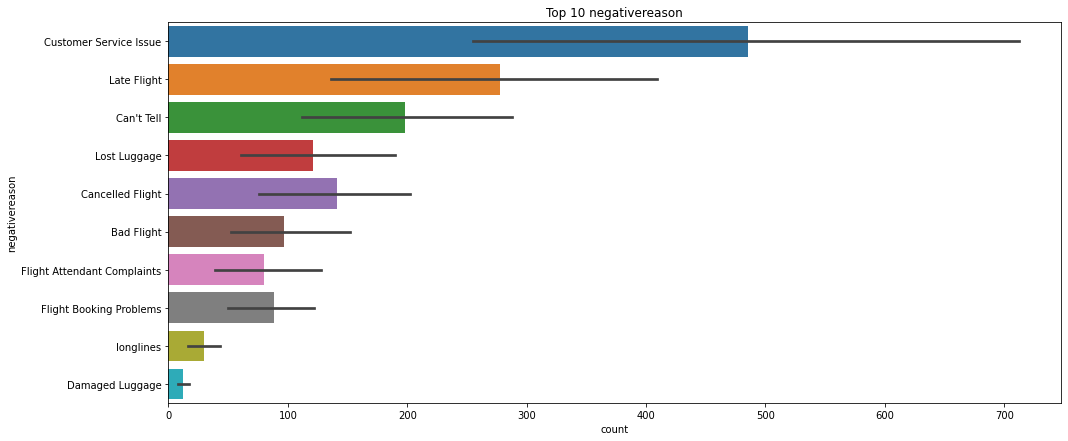

In [121]:
#Plot of distribution of all negative reasons
ds = ds.sort_values(['count'],ascending=False)
plt.figure(figsize=(16, 7))
fig = sns.barplot(
    x=ds["count"], 
    y=ds['negativereason'], 
    orientation='horizontal', 
).set_title('Top 10 negativereason')


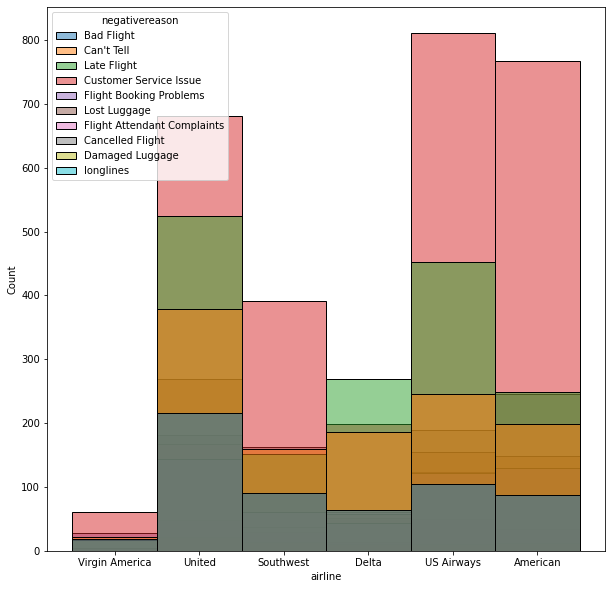

In [126]:
#Plot of distribution of all negative reasons by airline
plt.figure(figsize=(10,10))
sns.histplot(x='airline',data=df,hue=df['negativereason']) 
plt.show()

* The top reason for complaints are "Customer Service", "Late Flights" and "Cant Tell" (I assume that is equivalent of "Unknown" reason), and "Lost Luggage".
* Customer Service is a serious issue for most airlines relative to other issues with the exception of Delta which appears to struggle with an "unknown" issue followed by "Damaged Luggage" and "Cancelled Flights".  
* Like Delta, United while suffering from some Customer Service issues has far more problems with Cancelled and Late Flights.   

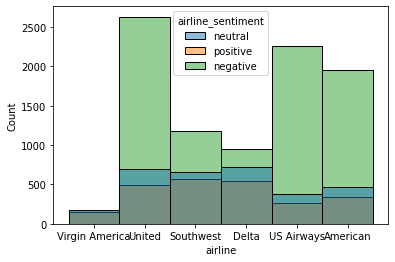

In [48]:
#Stacked Bar plot of distribution of sentiment of tweets for each airline.
sns.histplot(x='airline',data=df,hue=df['airline_sentiment']) 

* Virgin American airlines has the fewest reviews but nearly all appear to be positive.  However, nearly all of their reviews show a neutral sentiment.
* Delta has comparbly the fewest negative reviews and one of the larger positive review collections.
* United has the most reviews and in turn has both the most negative and the most positive reviews.
* The airlines with the most negative reviews is US Airways, United, and American.

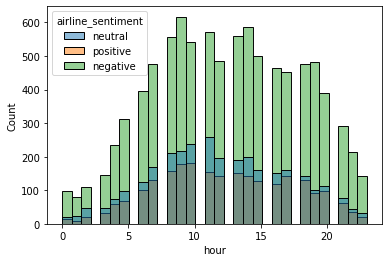

In [46]:
#Compare hour and sentiment
sns.histplot(x='hour',data=df,hue=df['airline_sentiment']) 

* The majority of reviews are coming in during the morning and afternoon.
* The majority of early and late tweets in the early and late part of the day are negative.
* The majority of positive reviews are between 9am and 3pm.

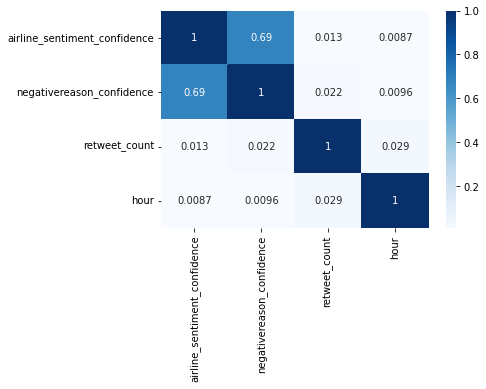

In [47]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

* Negative_sentiment_confidence and airline_sentiment_confidence are highly correlated but I'm not sure how useful this will be to our modeling and analysis as it appears the confidence may be based on the data collection tool that is a black box to us.

### **Word Cloud for Negative Reviews**

In [48]:
from wordcloud import WordCloud,STOPWORDS

In [49]:
#creating word cloud for negative reviews
negative_reviews=df[df['airline_sentiment']=="negative"]
words = ' '.join(negative_reviews['text'])
cleaned_word = " ".join([word for word in words.split()])

In [50]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

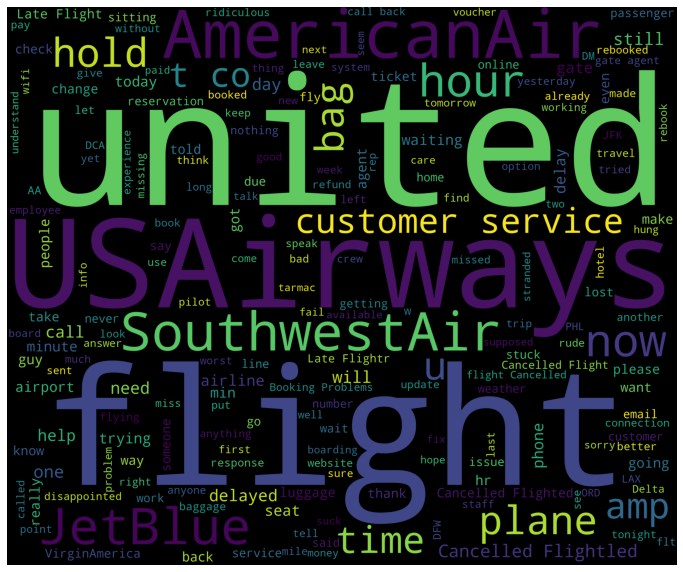

In [51]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* The most common words are the name of the airlines: United, US Airways, American, Jet Blue, SouthwestAir
*Top negative tweet words are: Flight, now, cancelled Flight, hour, bag, customer service, time, hold

### **Word Cloud for Positive Reviews**

In [52]:
#creating word cloud for negative reviews
negative_reviews=df[df['airline_sentiment']=="positive"]
words = ' '.join(negative_reviews['text'])
cleaned_word = " ".join([word for word in words.split()])

In [53]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

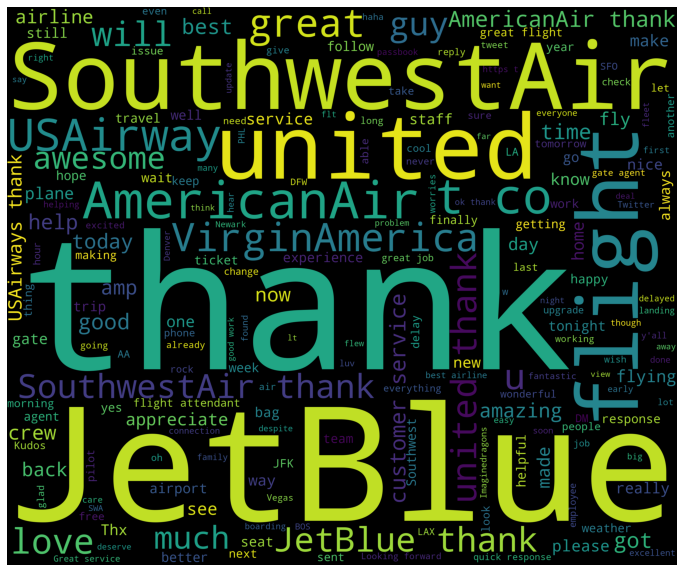

In [54]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* This time our top word is Thank followed by airline names: Jetblue, Southwest, United, AmericanAir and VirginAmerican.
* Additional positive tweet words aside from thank include: customer service, good, fly, best, great, love, much, help, best.  
* Hmmm, not very informative.  But it does appear that either with positive or negative reviews customer service was at the center.

## **Data Pre-processing**

* Remove all columns other than text and sentiment
* Remove html tags.
* Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
* Remove numbers.
* Remove the URL's.
* Remove the mentions in the tweets('@').
* Tokenization.
* To remove Stopwords.
* Remove the punctuations.
* Remove the non-ASCII characters.
* Remove the hashtags.
* Lemmatized data.


In [132]:
#Copy our dataset
df1 = df.copy()
df1 = df1[["text","airline_sentiment"]]
df1.shape

(14640, 2)

In [133]:
df1.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [134]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

# remove the url's present in the text
def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

# remove the mentions in the tweets
def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    text = remove_url(text)
    text = remove_mention(text)
    return text
df1['text'] = df1['text'].apply(lambda x: clean_text(x))
df1.head()

,text,airline_sentiment
0,What said.,neutral
1,plus you have added commercials to the experi...,positive
2,I did not today... Must mean I need to take a...,neutral
3,"it is really aggressive to blast obnoxious ""e...",negative
4,and it is a really big bad thing about it,negative


In [135]:
# Tokenization of data
df1['text'] = df1.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
df1.head()

,text,airline_sentiment
0,"[What, said, .]",neutral
1,"[plus, you, have, added, commercials, to, the,...",positive
2,"[I, did, not, today, ..., Must, mean, I, need,...",neutral
3,"[it, is, really, aggressive, to, blast, obnoxi...",negative
4,"[and, it, is, a, really, big, bad, thing, abou...",negative


In [136]:
stopwords = stopwords.words('english')
stopwords = list(set(stopwords)) 
lemmatizer = WordNetLemmatizer()

In [137]:

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


# Remove the hashtags
def remove_hash(text):
   """Remove hashtags from list of tokenized words"""
   new_words = []
   for word in words:
     new_word = re.sub(r'#\w+','',word)
     if new_word != '':
       new_words.append(new_word)
   return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

#Run all steps above on data to normalize the tweet text
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df1['text'] = df1.apply(lambda row: normalize(row['text']), axis=1)

In [138]:
df1.head(5)

,text,airline_sentiment
0,say,neutral
1,plus add commercials experience tacky,positive
2,today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainmen...,negative
4,really big bad thing,negative


## **Supervised Learning for Sentiment Analysis**

### **Bag of Words (CountVectorization)**

In [140]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

# Keep only 1000 features as number of features will increase the processing time.
Count_vec = CountVectorizer(max_features=1000)                
data_features = Count_vec.fit_transform(df1['text'])

# Convert the data features to array.
data_features = data_features.toarray()                        

In [141]:
data_features.shape

(14640, 1000)

In [142]:
#Return the first 20 Count_vec feature names
names = Count_vec.get_feature_names()
names[0:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'able',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'access',
 'accommodate',
 'account',
 'act',
 'actual',
 'actually',
 'add',
 'additional',
 'address',
 'advise',
 'advisory',
 'afternoon',
 'agent',
 'agents']

In [143]:
X = data_features

y = data.airline_sentiment

In [144]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False, random_state=1)

### **Model 1**

The first model will use CountVectorizer processed data with the RandomForestClassifier and cross validation as a base model.

In [146]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [147]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b, random_state=1)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

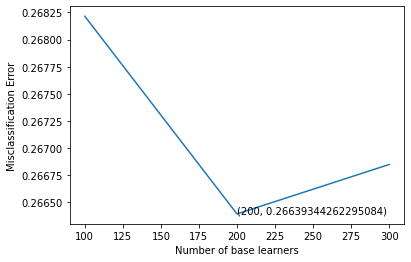

In [148]:

# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

Here we can see that the best number of learners for this model is 200.

In [149]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners, random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative' , 'positive', 'neutral']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      2627
    positive       0.49      0.47      0.48       577
     neutral       0.63      0.63      0.63       456

    accuracy                           0.78      3660
   macro avg       0.66      0.66      0.66      3660
weighted avg       0.78      0.78      0.78      3660

Accuracy of the model is :  0.7792349726775957


[[2290  228  109]
 [ 244  274   59]
 [ 110   58  288]]


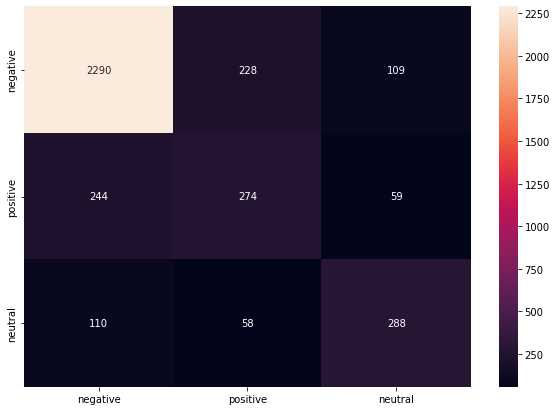

In [150]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'positive', 'neutral']],
                  columns = [i for i in ['negative', 'positive', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

* Predictive performance is pretty good with an overall accuracy of .78.  
* Predictave performance on negative class is very good with an F1 Score of .87 but the positive class F1 Score is only .48.
* We can see from the confusion matrix that this model is predicting 244 rows as negative when they are actually positive.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


thank,delay,great,flight,love,hours,bag,hold,awesome,get,hour,cancel,best,amaze,would,fly,please,wait,time,service,worst,plane,customer,fleek,make,call,go,help,need,lose,never,still,miss,say,one,good,tell,try,luggage,hrs,
 
 


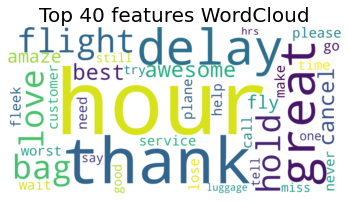

In [151]:
#Create a word Cloud with the top 40 words
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

Observations:
* The top words are: hour, thank, delay, great, flight, love, bag, cancel, awesome.
* It appears that there are a lot of very positive words, but it appears that the top complaints are regarding long delays (possibly in customer service responses or travel), cancelations and issues with luggage.  Since we do know that Customer Service appears to be a top issue, we can assume that these complaints are possibly regarding unresolved customer requests to solve delay, cancellations or luggage issues.

### **Model 2**

Using Randomized Search CV to identify better more effective hyperparameters for the features in the model.

In [160]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = (200) #Will be set to 200 since we already know its the best n_estimator from the prior model.
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = (50,70)
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
    #'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': (50, 70), 'min_samples_split': [5, 7], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [161]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': (50, 70),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [5, 7]},
                   random_state=1, verbose=2)

In [162]:
rf_random.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': True}

In [164]:
rf_rand_cv = RandomForestClassifier(n_estimators=200,min_samples_split=5,min_samples_leaf=1,max_features='sqrt',max_depth=70,bootstrap='True', random_state=1)
rf_rand_cv.fit(X_train, y_train)
rf_rand_cv.score(X_test, y_test)
randomized_cv_predicted = rf_rand_cv.predict(X_test)
print(classification_report(y_test ,randomized_cv_predicted , target_names = ['negative' , 'positive', 'neutral']))
print("Accuracy of the model is : ",accuracy_score(y_test,randomized_cv_predicted))

              precision    recall  f1-score   support

    negative       0.84      0.93      0.88      2627
    positive       0.56      0.34      0.43       577
     neutral       0.69      0.63      0.66       456

    accuracy                           0.80      3660
   macro avg       0.70      0.63      0.66      3660
weighted avg       0.78      0.80      0.78      3660

Accuracy of the model is :  0.7969945355191257


[[2431  118   78]
 [ 328  198   51]
 [ 132   36  288]]


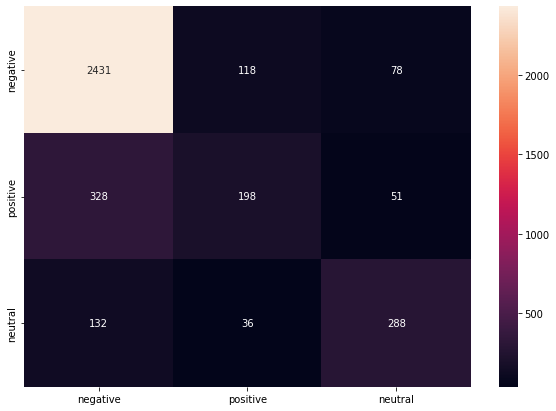

In [165]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, randomized_cv_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'positive', 'neutral']],
                  columns = [i for i in ['negative', 'positive', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Observations:
* The accuracy improved to .80 from Model 1.  However, the Recall and F1 Score of the Positive Class is significantly down from .47 and .48 to .34 and .43 respectively.


* The F1 Score for Model 2 neutral class has slightly improved while the negative class has improved its recall but lost points in its precision leaving it with only a .01 point improvement in its F1 Score.
* Even with the slight gain, I believe the very poor predictive ability of the positive class makes it not worth keeping.  It is very valuable for the airline to know what it is doing well and thus we would not want to lose predictive points in either our positive or negative classes.
* The Negative F1 score is so much higher than the other two classifications that I wonder if the imbalanced data across the 3 classes is the issue.  I will attempt to balance the 3 classes in the next model to see if it improves model performance.

thank,delay,great,love,hours,hold,awesome,bag,flight,hour,cancel,amaze,best,fleek,worst,wait,plane,customer,service,lose,time,call,fleet,never,hrs,miss,sit,luggage,still,destinationdragons,hi,tell,follow,get,say,please,would,try,late,dm,
 
 


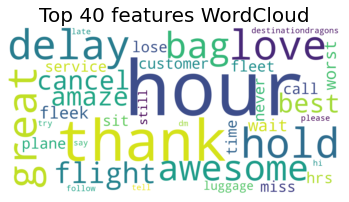

In [188]:
#Create a word Cloud with the top 40 words
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=rf_rand_cv.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

The word cloud for Model 2 is very similar to model 1.  
Some exceptions include the fact that hour is more prominent in Model 1 as is great.  Awesome is more prominent on Model 2.

### **Model 3**


For Model 3, I will use Randomized Search CV but will try to add Oversampling to see if a more balanced dataset will improve performance.

In [166]:

# check version number
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

0.8.1


In [167]:
sm = SMOTE("minority")
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [168]:
print('y_train')
print(len(y_train_over))
print(y_train.value_counts())
print('')
print('y_train_over')
print(len(y_train_over))
print(y_train_over.value_counts())

y_train
15624
negative    6551
neutral     2522
positive    1907
Name: airline_sentiment, dtype: int64

y_train_over
15624
positive    6551
negative    6551
neutral     2522
Name: airline_sentiment, dtype: int64


In [169]:
sm = SMOTE("minority")
X_train_over, y_train_over = sm.fit_resample(X_train_over, y_train_over)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [170]:
print('y_train')
print(len(y_train_over))
print(y_train.value_counts())
print('')
print('y_train_over')
print(len(y_train_over))
print(y_train_over.value_counts())

y_train
19653
negative    6551
neutral     2522
positive    1907
Name: airline_sentiment, dtype: int64

y_train_over
19653
neutral     6551
positive    6551
negative    6551
Name: airline_sentiment, dtype: int64


* Smote minority increased the positive and neutral classes to match the size of negative class.  Lets see what that does to model accuracy.

Lets try to rerun the random search CV for the new dataset to see if it still choses the same hyperparameter values with the oversampled datasets.

In [171]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = (200,300) #trying 300 to see if it improves anything
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = (70,80)
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': (200, 300), 'max_features': ['sqrt'], 'max_depth': (70, 80), 'min_samples_split': [5, 7], 'min_samples_leaf': [1], 'bootstrap': [True]}


In [173]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_smote = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
rf_random_smote.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': (70, 80),
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [5, 7],
                                        'n_estimators': (200, 300)},
                   random_state=1, verbose=2)

In [174]:
rf_random_smote.best_params_

{'n_estimators': 300,
 'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

I decided to rerun the random search with a couple of new settings to see how it does.  The model seems to prefer 300 n_estimators over 200, a max_depth of 80 rather than 70, and a min_sample_split of 7 rather than 5.

In [176]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

clf_rand_smote = RandomForestClassifier(n_estimators=300,min_samples_split=7,min_samples_leaf=1,max_features='sqrt',max_depth=80,bootstrap='True', random_state=1)
clf_rand_smote.fit(X_train_over, y_train_over)
clf_rand_smote.score(X_test, y_test)
rand_smote_predicted = clf_rand_smote.predict(X_test)
print(classification_report(y_test ,rand_smote_predicted , target_names = ['negative' , 'positive', 'neutral']))
print("Accuracy of the model is : ",accuracy_score(y_test,rand_smote_predicted))



              precision    recall  f1-score   support

    negative       0.89      0.79      0.83      2627
    positive       0.40      0.58      0.48       577
     neutral       0.60      0.66      0.63       456

    accuracy                           0.74      3660
   macro avg       0.63      0.67      0.65      3660
weighted avg       0.77      0.74      0.75      3660

Accuracy of the model is :  0.737431693989071


Observations:
* The accuracy has dropped down to 74 from 77 in model 1.  The main reason appears to be a drop in the F1 Score of the Negative class.  
* Interestingly the the F1 Score for the Positive class is up to the same accuracy as Model 1.
* I will try one more model.  I will use the same hyperparameter settings as Model 1 but train it on the oversampled data to see if that improves performance.

### **Model 4**

Since the first model performed the best, lets use the hyperparameter settings of the first model and train it on the oversampled data to see if we can squeeze a little better performance out of it.

In [177]:
# Training the best model and calculating accuracy on test data .
clf_smote = RandomForestClassifier(n_estimators = optimal_learners, random_state=1)
clf_smote.fit(X_train_over, y_train_over)
clf_smote.score(X_test, y_test)
clf_smote_predicted = clf_smote.predict(X_test)
print(classification_report(y_test ,clf_smote_predicted , target_names = ['negative' , 'positive', 'neutral']))
print("Accuracy of the model is : ",accuracy_score(y_test,clf_smote_predicted))

              precision    recall  f1-score   support

    negative       0.89      0.77      0.82      2627
    positive       0.40      0.53      0.46       577
     neutral       0.51      0.70      0.59       456

    accuracy                           0.72      3660
   macro avg       0.60      0.67      0.62      3660
weighted avg       0.77      0.72      0.74      3660

Accuracy of the model is :  0.7210382513661202


[[2431  118   78]
 [ 328  198   51]
 [ 132   36  288]]


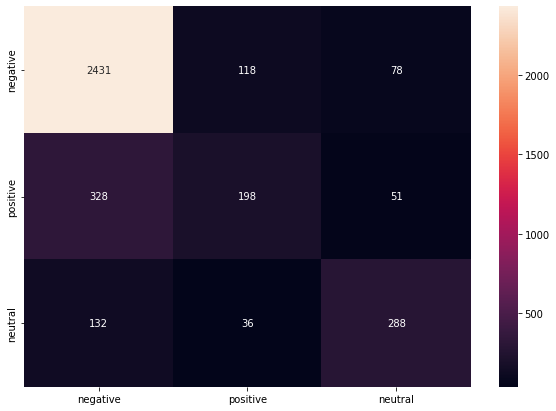

In [178]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, randomized_cv_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'positive', 'neutral']],
                  columns = [i for i in ['negative', 'positive', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Observations:
* With an accuracy of just 72%, this is the worst overall accuracy result of any model so far.
* I will keep Model 1.

## **TF-IDF**

Attempting to reuse Model 1 with TF-IDF.

In [179]:
tfidf_vect = TfidfVectorizer(max_features=500)
data_features = tfidf_vect.fit_transform(df1['text'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(14640, 500)

In [180]:
X = data_features

y = data.airline_sentiment

In [182]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

### **Model 5**

In [183]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

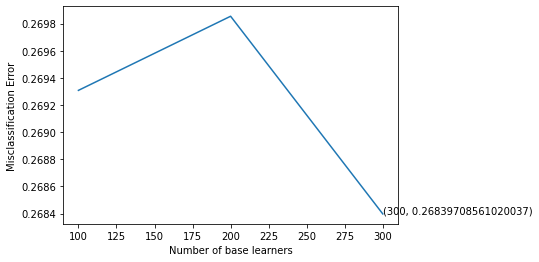

In [185]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

Hmmm, this model seems to prefer 300 learners like Model 3 rather than 200 like Model 1.



In [189]:
# Training the best model and calculating accuracy on test data .
clf_tfidf = RandomForestClassifier(n_estimators = optimal_learners, random_state=1)
clf_tfidf.fit(X_train, y_train)
clf_tfidf.score(X_test, y_test)
tf_idf_predicted = clf_tfidf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['negative','positive','neutral']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

    negative       0.85      0.90      0.88      2627
    positive       0.54      0.43      0.48       577
     neutral       0.67      0.62      0.65       456

    accuracy                           0.79      3660
   macro avg       0.69      0.65      0.67      3660
weighted avg       0.78      0.79      0.79      3660

Accuracy of the model is :  0.7926229508196722


[[2369  169   89]
 [ 278  247   52]
 [ 133   38  285]]


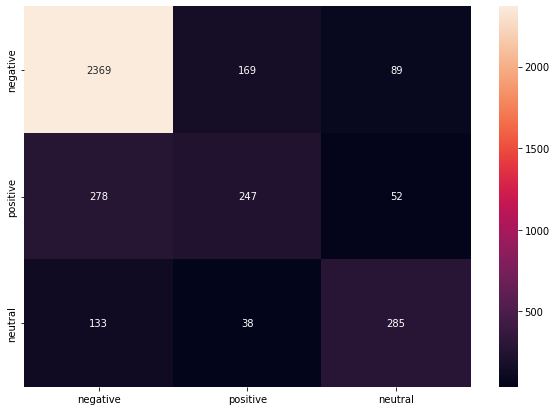

In [190]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, tf_idf_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative','positive','neutral']],
                  columns = [i for i in ['negative','positive','neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Observation:
* Model 5 is getting an accuracy score of .79.  This is .02 points better than Model 1 (.77) but .01 points less than Model 3 (.80).  
* The F1-Score has ticked up slightly for each class from Model 1 and has ticked up for the negative class F1 Score from Model 3.
* One of the biggest issues with this prediction is that over half of positive tweets are being labeled as negative.
* Regardless this model gives us the best negative predictions without sacrificing positive class predictions.

thank, flight, great, delay, love, get, awesome, hours, hold, bag, cancel, fly, please, best, amaze, wait, time, service, would, hour, make, need, know, help, go, fleek, plane, good, dm, fleet, customer, airline, call, worst, follow, still, say, tomorrow, like, never, 
 
 


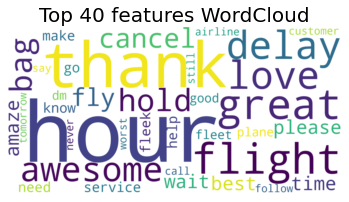

In [192]:
#Return the top 40 terms from the TF-IDF term scoring
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf_tfidf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

* The top occuring words appear to be largely the same.
* One noticeable difference is that "delay" and "thank" are far more prominent in the CountVectorizer WordCloud than in the TF-IDF model.
* "Love", "Awesome" and "Amaze" are more prominent in the TF-IDF word cloud.
* Overall both clouds are largely the same.

## **Conclusion**

* The goal was to build a model for accurately predicting a tweet about an airline experience as having positive, negative, or neutral sentiment.
* The best model for predicting the correct sentiment was Model 5 which utilized TF-IDF, and Cross Validation with the Random Forest Classifier.  The accuracy was .79 and provided the most balanced results of any model.
* It would be worthwhile to invest effort into improving the predictive performance of the positive classification.  It never got an F1 Score above .48.
* For most airlines in this analysis, the greatest issue in negative tweets was Customer Service when .  However, some airlines such as United and Delta are really struggling with Delayed and Cancelled Flights from the perspective of their customers.
* There are significantly more negative tweets than positive or nuetral tweets.  It is in fact true that if a customer is unhappy they are far more likely to tell others than if they are happy with the service.
* I cant say this with certainty without cleaning the location data, but it appears that the majority of tweets are coming from the North East and Chicago.  It would be worthwhile for the airlines to look at their customer service and Flight Delays/Cancellations in that region.
* It would be worthwhile to invest in cleaning the data to better analyze some of the tweet metadata.
